In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import cross_val_predict
from sklearn import metrics
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
import warnings
warnings.filterwarnings("ignore")

In [2]:
names=['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT','MEDV'] 
df=pd.read_csv('Dataset/Boston_Housing/housing.csv',delim_whitespace=True,names=names) 

In [3]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [4]:
df.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS         int64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD          int64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
MEDV       float64
dtype: object

In [5]:
# check for missing values in all the columns
print("[INFO] df isnull():\n {}".format(df.isnull().sum()))

[INFO] df isnull():
 CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64


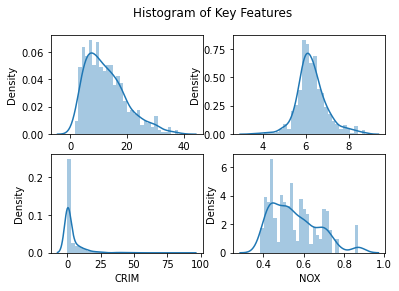

In [6]:
fig, axes = plt.subplots(2, 2)
fig.suptitle("Histogram of Key Features")

sns.distplot(df['LSTAT'], bins=30, ax=axes[0, 0])
sns.distplot(df['RM'], bins=30, ax=axes[0, 1])
sns.distplot(df['CRIM'], bins=30, ax=axes[1, 0])
sns.distplot(df['NOX'], bins=30, ax=axes[1, 1])
plt.show()


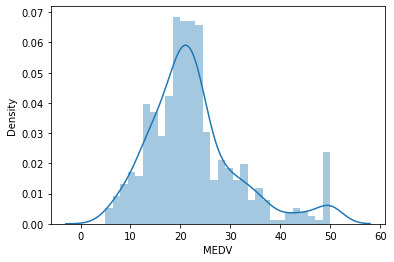

In [7]:
# plot a histogram showing the distribution of the target variable
sns.distplot(df['MEDV'], bins=30)

plt.show()

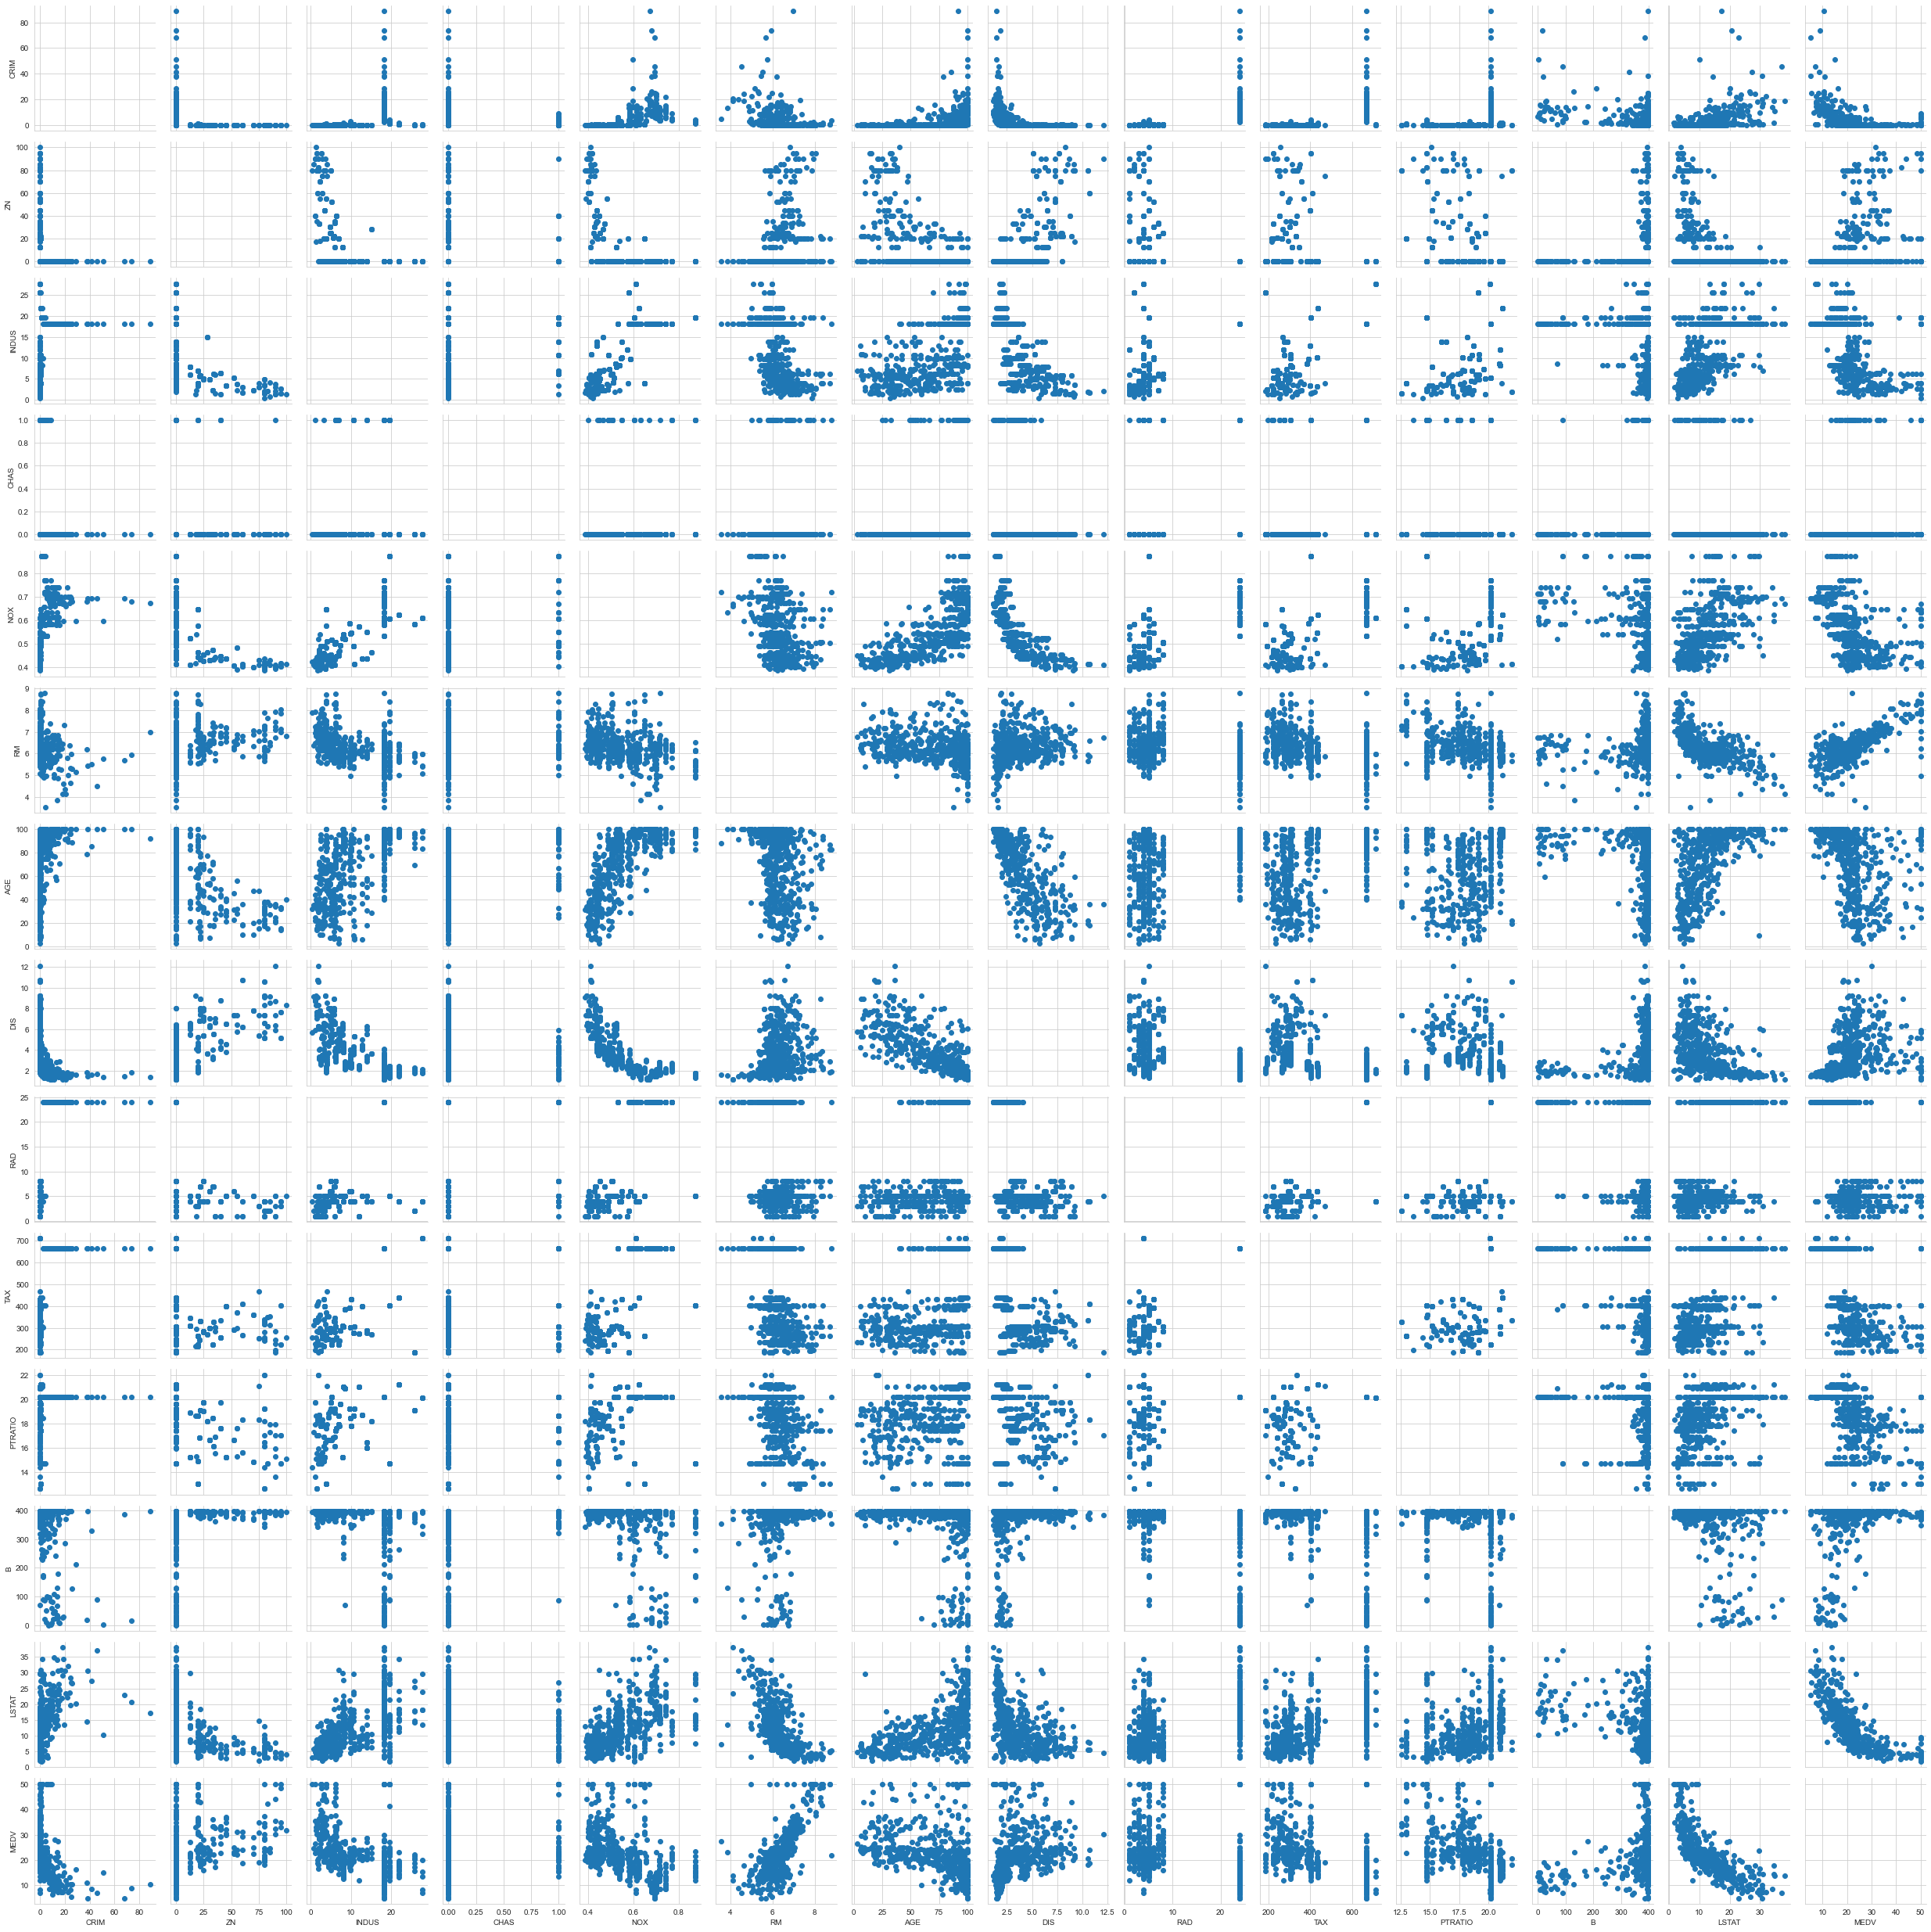

In [8]:
sns.set_style('whitegrid')
scatterplots=sns.PairGrid(df)
scatterplots.map_offdiag(plt.scatter) 
plt.show() 

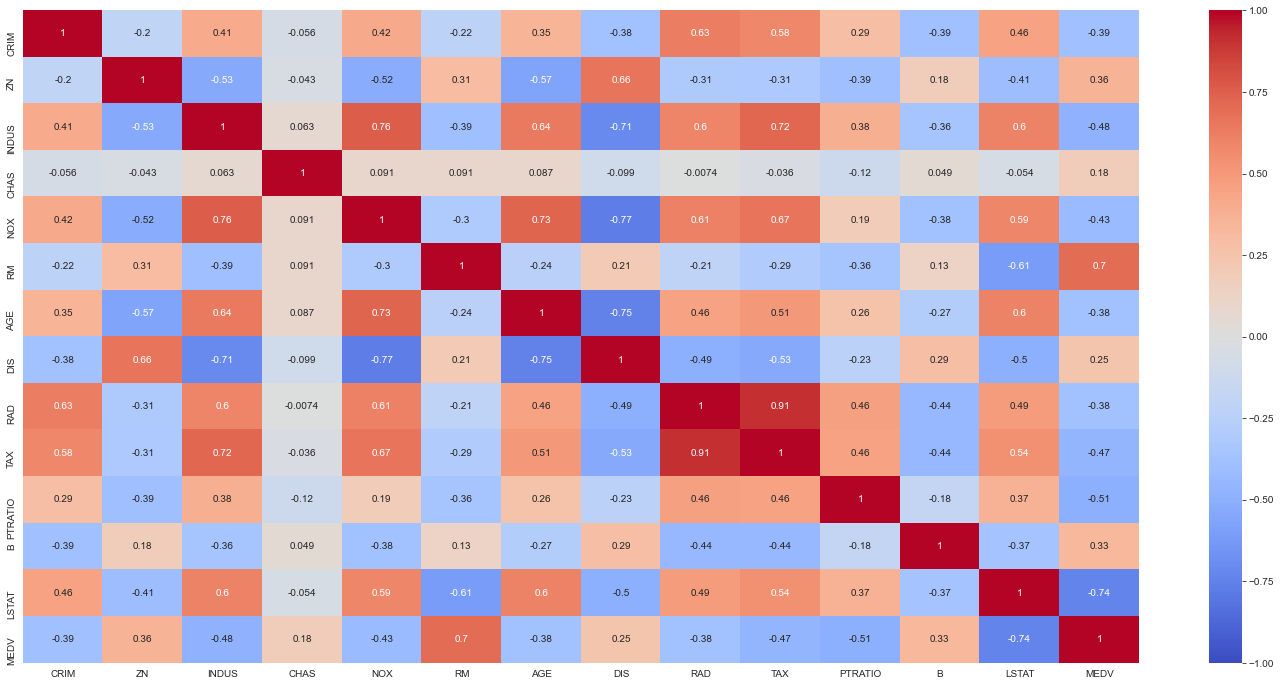

In [9]:
plt.figure(figsize=(25, 12))
sns.heatmap(df.corr(), vmin = -1, vmax = 1, center = 0, cmap = 'coolwarm', annot = True)
plt.show()

In [10]:
#split the data into predictors X and Y 
X=df.iloc[:,:12]
y=df.iloc[:,13]

In [11]:
#Splitting to training and testing data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=1)

In [12]:
#Applying Linear Regression
lr_all=LinearRegression()  
lr_all.fit(X_train, y_train) 
y_pred1=lr_all.predict(X_test)
# coefficient of intercept
lr_all.intercept_

30.8578330890054

In [13]:
#accuracy score 
print('R^2:',metrics.r2_score(y_test, y_pred1))
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_test, y_pred1))*(len(y_test)-1)/(len(y_test)-X_train.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_test, y_pred1))
print('MSE:',metrics.mean_squared_error(y_test, y_pred1))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test, y_pred1)))

R^2: 0.7585173392839138
Adjusted R^2: 0.7376699153372014
MAE: 3.452004055697846
MSE: 22.132969411911
RMSE: 4.7045689932140435


In [14]:
"Creates a polynomial regression model for the given degree"
poly_features = PolynomialFeatures(degree=2)
   
# transform the features to higher degree features.
X_train_poly = poly_features.fit_transform(X_train)
   
# fit the transformed features to Linear Regression
poly_model = LinearRegression()

poly_model.fit(X_train_poly, y_train)
     
# predicting on training data-set
y_train_predicted = poly_model.predict(X_train_poly)
   
# predicting on test data-set
y_test_predicted = poly_model.predict(poly_features.fit_transform(X_test))

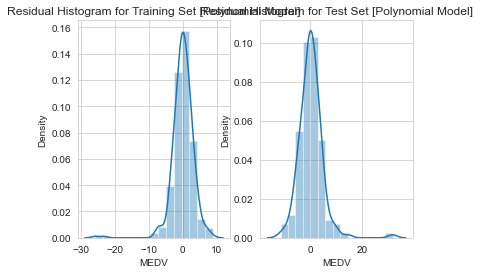

In [15]:
y_train_residual = y_train_predicted - y_train
y_test_residual = y_test_predicted - y_test

plt.subplot(1, 2, 1)
sns.distplot(y_train_residual, bins=15)
plt.title('Residual Histogram for Training Set [Polynomial Model]')

plt.subplot(1, 2, 2)
sns.distplot(y_test_residual, bins=15)
plt.title('Residual Histogram for Test Set [Polynomial Model]')

plt.show()

In [16]:
print('R^2:',metrics.r2_score(y_test, y_test_predicted))
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_test, y_test_predicted))*(len(y_test)-1)/(len(y_test)-X_train.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_test, y_test_predicted))
print('MSE:',metrics.mean_squared_error(y_test, y_test_predicted))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test, y_test_predicted)))

R^2: 0.7685114086533842
Adjusted R^2: 0.7485267820623094
MAE: 3.065270977833707
MSE: 21.216968109792376
RMSE: 4.60618802371249


In [17]:
#Ridge Regression
ridge=Ridge(alpha=100)
ridge.fit(X_train, y_train)
y_pred2=ridge.predict(X_test)
ridge.score(X_test, y_test)
#Low alpha
rr1=Ridge(alpha=0.01)
rr1.fit(X_train,y_train)
#High alpha
rr2=Ridge(alpha=100)
rr2.fit(X_train,y_train)
#Just Right
rr3=Ridge(alpha=1)
rr3.fit(X_train,y_train)
#Ridge regression test score with low alpha(0.1):
print('Linear regression test score:',lr_all.score(X_test,y_test))
print('Ridge regression test score with low alpha(0.1):',rr1.score(X_test,y_test))
print('Ridge regression test score with high alpha(100):',rr2.score(X_test,y_test))
print('Ridge regression test score with low alpha(1):',rr3.score(X_test,y_test))

Linear regression test score: 0.7585173392839138
Ridge regression test score with low alpha(0.1): 0.7587193637552938
Ridge regression test score with high alpha(100): 0.6757283037427892
Ridge regression test score with low alpha(1): 0.7645516158373611


In [18]:
#LASSO Linearf Regression
lasso=Lasso(alpha=0.8)
lasso.fit(X_train, y_train)
y_pred3=lasso.predict(X_test)
lasso.score(X_test, y_test)

0.6879736470132942

In [19]:
#Converting the coefficient values to a dataframe
lasso_coeffcients = pd.DataFrame([X_train.columns,lasso.coef_]).T
lasso_coeffcients = lasso_coeffcients.rename(columns={0: 'Attribute', 1: 'Coefficients'}) #put into dataframe
lasso_coeffcients 

,Attribute,Coefficients
0,CRIM,-0.147837
1,ZN,0.046587
2,INDUS,-0.076092
3,CHAS,0.0
4,NOX,-0.0
5,RM,3.968703
6,AGE,-0.061737
7,DIS,-0.800901
8,RAD,0.219891
9,TAX,-0.013019
